# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

9

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e3ccf44e02cf0a5895ed131fd26f64b2&units=imperial&q='

In [5]:
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -33.65, 'lon': 115.3333},
 'dt': 1644096582,
 'id': 2075265,
 'main': {'feels_like': 65.44,
          'grnd_level': 1001,
          'humidity': 89,
          'pressure': 1001,
          'sea_level': 1001,
          'temp': 65.05,
          'temp_max': 65.05,
          'temp_min': 65.05},
 'name': 'Busselton',
 'sys': {'country': 'AU',
         'id': 2020551,
         'sunrise': 1644097517,
         'sunset': 1644146410,
         'type': 2},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 214, 'gust': 8.93, 'speed': 6.62}}


In [6]:
# set up lists to hold reponse info
thiscity = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for idx, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        thiscity.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])                  
        print(f"Weather check for city {idx}: {city}")
    
    except:
        print(f"Missing result... city {idx}: {city} NOT FOUND")

Weather check for city 0: severo-kurilsk
Weather check for city 1: tuatapere
Weather check for city 2: busselton
Weather check for city 3: vila velha
Missing result... city 4: umzimvubu NOT FOUND
Weather check for city 5: keti bandar
Weather check for city 6: alice springs
Weather check for city 7: ushuaia
Weather check for city 8: nelson bay


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
print(len(thiscity))
print(len(lat))
print(len(lon))
print(len(max_temp))

8
8
8
8


In [11]:
# create the data frame
weather_dict = {
    'city': thiscity,
    'lat': lat,
    'lon': lon,
    'max temp': max_temp,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind speed': wind_speed,
    'country': country,
    'date': date
}
city_df = pd.DataFrame(weather_dict)
city_df

,city,lat,lon,max temp,humidity,cloudiness,wind speed,country,date
0,Severo-Kuril'sk,50.6789,156.1250,28.17,86,100,5.91,RU,1644096582
1,Tuatapere,-46.1333,167.6833,53.82,82,99,3.80,NZ,1644096583
2,Busselton,-33.6500,115.3333,65.05,89,20,6.62,AU,1644096582
3,Vila Velha,-20.3297,-40.2925,78.75,85,40,7.00,BR,1644096308
4,Keti Bandar,24.1447,67.4497,69.94,61,0,9.08,PK,1644096583
5,Alice Springs,-23.7000,133.8833,56.75,88,0,0.00,AU,1644096584
6,Ushuaia,-54.8000,-68.3000,55.06,71,40,23.02,AR,1644096269
7,Nelson Bay,-32.7167,152.1500,73.00,63,93,4.00,AU,1644096584


In [13]:
# export to a CSV
city_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = city_df[(city_df['humidity'] > 100)]
high_humidity_df.index

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#clean_city_df = city_df.join(high_humidity_df, how='outer')
#clean_city_df = pd.merge(city_df, high_humidity_df, on=index)
#clean_city_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [15]:
# date of analysis
find_date = city_df["date"][0]
run_date = pd.to_datetime(find_date, unit='s')
run_date

Timestamp('2022-02-05 21:29:42')

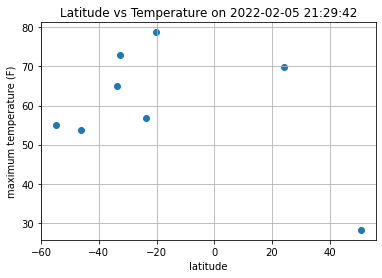

In [44]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_maxtemp = city_df['max temp']
plt.scatter(x_lat, y_maxtemp)

# titles, labels, and design elements
plt.title(f'Latitude vs Temperature on {run_date}')
plt.xlabel('latitude')
plt.ylabel('maximum temperature (F)')
plt.grid()

# display plot
plt.show()

In [17]:
# export .png to file
plt.savefig("../output_data/LatVsTemp.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

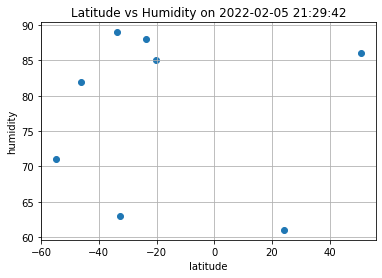

In [45]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_humidity = city_df['humidity']
plt.scatter(x_lat, y_humidity)

# titles, labels, and design elements
plt.title(f'Latitude vs Humidity on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# display plot
plt.show()

In [19]:
# export .png to file
plt.savefig("../output_data/LatVsHumidity.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

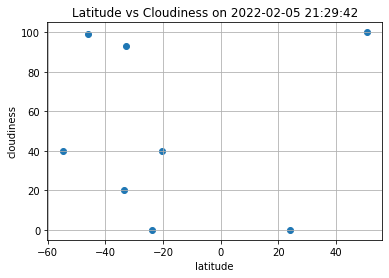

In [46]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_cloudiness = city_df['cloudiness']
plt.scatter(x_lat, y_cloudiness)

# titles, labels, and design elements
plt.title(f'Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# display plot
plt.show()

In [21]:
# export .png to file
plt.savefig("../output_data/LatVsCloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

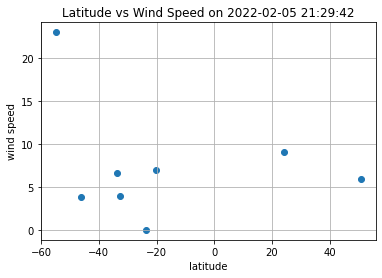

In [47]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_windspeed = city_df['wind speed']
plt.scatter(x_lat, y_windspeed)

# titles, labels, and design elements
plt.title(f'Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.grid()

# display plot
plt.show()

In [23]:
# export .png to file
plt.savefig("../output_data/LatVsWindSpeed.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [56]:
northern_df = city_df.loc[city_df['lat'] > 0]
southern_df = city_df.loc[city_df['lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temperature (F) is -1.0



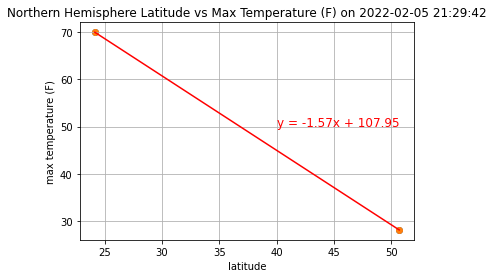

In [75]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_maxtemp_north = northern_df['max temp']
plt.scatter(x_lat_north, y_maxtemp_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Max Temperature (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_maxtemp_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_maxtemp_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(40, 50),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature (F) is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temperature (F) is 0.6557781603547598



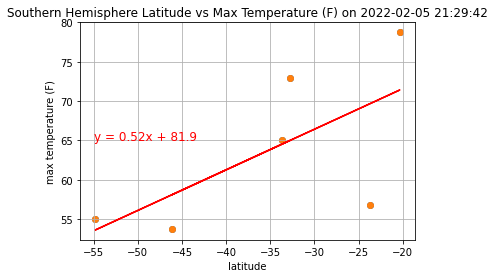

In [79]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_maxtemp_south = southern_df['max temp']
plt.scatter(x_lat_south, y_maxtemp_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Max Temperature (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_maxtemp_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_maxtemp_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 65),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature (F) is {rvalue}")
print("")

# display plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and humidity is 1.0



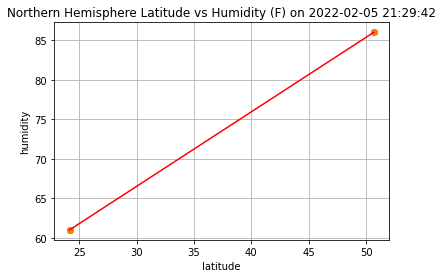

In [80]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_humidity_north = northern_df['humidity']
plt.scatter(x_lat_north, y_humidity_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Humidity (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_humidity_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_humidity_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(40, 50),fontsize=12,color="red")

print(f"The correlation between latitude and humidity is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and max temperature (F) is 0.42661525977055176



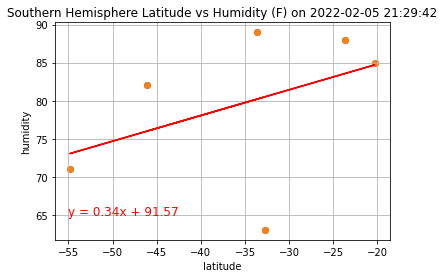

In [81]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_humidity_south = southern_df['humidity']
plt.scatter(x_lat_south, y_humidity_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Humidity (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_humidity_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_humidity_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 65),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature (F) is {rvalue}")
print("")

# display plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness is 1.0



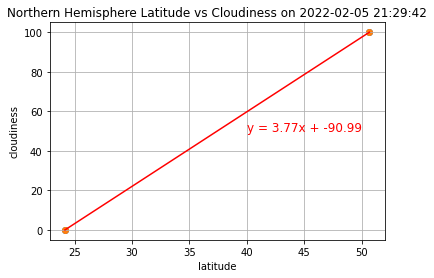

In [83]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_cloudiness_north = northern_df['cloudiness']
plt.scatter(x_lat_north, y_cloudiness_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_cloudiness_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_cloudiness_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(40, 50),fontsize=12,color="red")

print(f"The correlation between latitude and cloudiness is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness is -0.3851535377710032



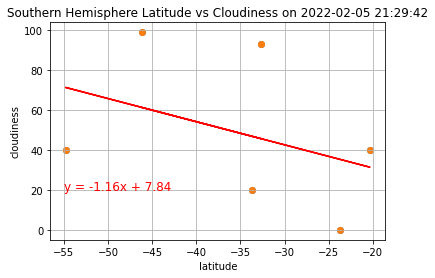

In [85]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_cloudiness_south = southern_df['cloudiness']
plt.scatter(x_lat_south, y_cloudiness_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_cloudiness_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_cloudiness_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 20),fontsize=12,color="red")

print(f"The correlation between latitude and cloudiness is {rvalue}")
print("")

# display plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed is -1.0



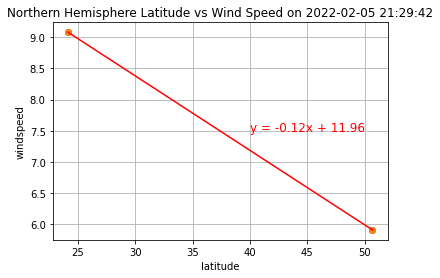

In [87]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_windspeed_north = northern_df['wind speed']
plt.scatter(x_lat_north, y_windspeed_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('windspeed')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_windspeed_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_windspeed_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(40, 7.5),fontsize=12,color="red")

print(f"The correlation between latitude and wind speed is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed is -0.6938803818255019



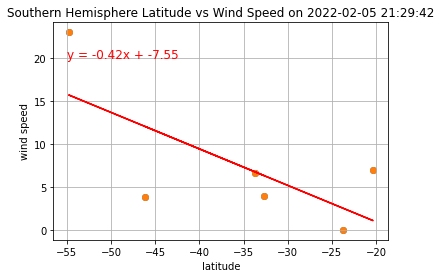

In [88]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_windspeed_south = southern_df['wind speed']
plt.scatter(x_lat_south, y_windspeed_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_windspeed_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_windspeed_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 20),fontsize=12,color="red")

print(f"The correlation between latitude and wind speed is {rvalue}")
print("")

# display plot
plt.show()